# Descenso del gradiente

Tutorial del descenso de gradiente por Alba Reinders Sánchez siguiendo el tutorial de  [Dot CSV](https://www.youtube.com/watch?v=-_A_AAxqzCg)

**Bibiotecas necesarias**



In [1]:
import numpy as np  #biblioteca de cálculos numéricos
import scipy as sc  #biblioteca de funciones científicas, extensión de numpy

import matplotlib.pyplot as plt  #biblioteca para visualización de datos

$F(x,y) = \sin (\dfrac{1}{2}x² - \dfrac{1}{4}y²) \cos (2x + 1 - e^y)$

**Función que queremos optimizar**

In [2]:
#lambda función anónima, th vector de parámetros
func = lambda th: np.sin(1 / 2 * th[0] ** 2 - 1 / 4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1])

#llamar a la función
print(func([2, 3]))
print(func([8, 12]))

-0.31008668289100455
0.8319755387543118


## Generamos un vector con una secuencia de valores de 'x' e 'y'

**Este vector es el que vamos a evaluar con la función**

In [3]:
res = 100 #variable de resolución

_X = np.linspace(-2, 2, res) #generar 100 valores entre -2 y 2

_Y = np.linspace(-2, 2, res)

In [4]:
_Z = np.zeros((res, res)) #matriz donde se guardará los valores, la inicializamos a 0

for ix, x in enumerate(_X):  #enumerate en ix el índice y el valor en x
    for iy, y in enumerate(_Y):
        #el primer valor se refiere a las filas (eje y) y el segundo a las columnas (eje x)
        _Z[iy, ix] = func([x, y])  
        
print(_Z)

[[ 0.75678768  0.69949249  0.63520381 ...  0.00601758 -0.05013846
  -0.1147978 ]
 [ 0.78233319  0.72763874  0.66546524 ...  0.0100609  -0.04806718
  -0.11435375]
 [ 0.80611957  0.75410427  0.69414667 ...  0.01456705 -0.04540738
  -0.11319675]
 ...
 [ 0.74539135  0.72025173  0.6843787  ...  0.27770918  0.24181329
   0.19526019]
 [ 0.61239218  0.60628261  0.5884932  ...  0.42781714  0.41611394
   0.39256434]
 [ 0.43138509  0.44549641  0.44762885 ...  0.53501224  0.54960755
   0.55243366]]


### Crear una representación de _Z desde la vista de pájaro

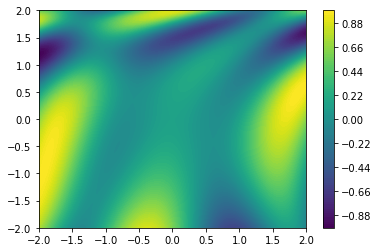

In [5]:
plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.show()

#### Las zonas azul oscuro representan los "valles", mientras que las zonas amarillas representa los "picos"

El objetivo del descenso del gradiente es llegar a los "valles"

## Generar un punto aleatorio sobre esta superficie

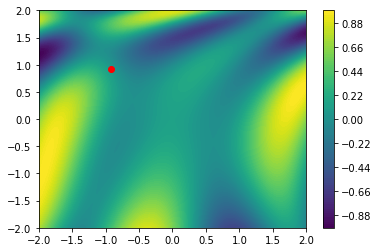

In [6]:
Theta = np.random.rand(2) * 4 - 2 #generamos dos números aleatorios entre -2 y 2

plt.plot(Theta[0], Theta[1], "o", c="red")
plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.show()

## Derivadas parciales

**Calcular la pendiente en cada uno de los ejes de la función en un punto concreto**


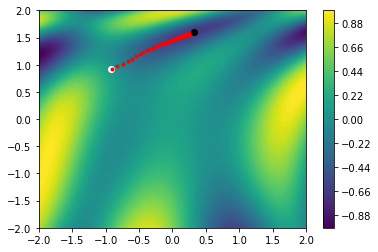

In [7]:
Theta_cpy = np.copy(Theta)

#Variable de incremento
h = 0.001

#Vector gradiente
grad = np.zeros(len(Theta_cpy))

#Ratio de aprendizaje
lr = 0.01

plt.plot(Theta_cpy[0], Theta_cpy[1], "o", c="white")

for _ in range(10000):

    for it, th in enumerate(Theta_cpy):
        
        #Generar copia del vector Theta
        _T = np.copy(Theta_cpy)

        _T[it] = _T[it] + h  #Incrementar un poco uno de los componentes del vector

        #Restar al nuevo valor de la func el valor de la func original para ver si ha mejorado o empeorado
        #Derivada parcial del vector 
        deriv = (func(_T) - func(Theta_cpy)) / h #Lo divido entre h porque es un ratio

        grad[it] = deriv


    Theta_cpy = Theta_cpy - lr * grad
    
    if(_ % 10 == 0):
        plt.plot(Theta_cpy[0], Theta_cpy[1], ".", c="red") 
        pass
    
plt.plot(Theta_cpy[0], Theta_cpy[1], "o", c="black")   

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.show()